In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [3]:
df = (tips
      .groupby('sex')['smoker']
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())
df

,No,Yes
sex,,
Male,61.78,38.22
Female,62.07,37.93


<BarContainer object of 2 artists>

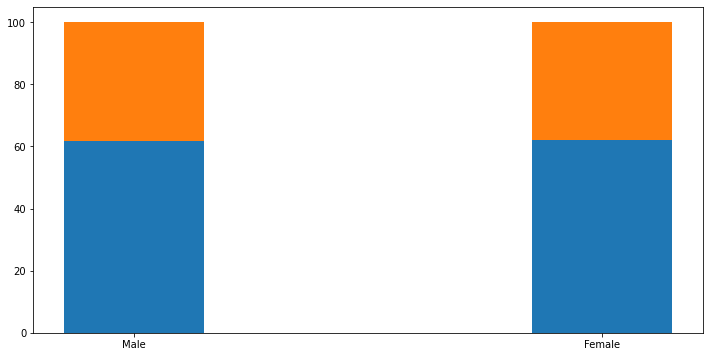

In [4]:
fig, ax = plt.subplots(figsize = (12,6))
ax.bar(df.index, df['No'], label = 'No', width = 0.3) 
ax.bar(df.index, df['Yes'], bottom = df['No'], label = 'Yes', width = 0.3)

In [5]:
# Check for containers
ax.containers

[<BarContainer object of 2 artists>, <BarContainer object of 2 artists>]

In [6]:
# Print what containter 0 and 1 have
print(ax.containers[0])
print(ax.containers[1])

<BarContainer object of 2 artists>
<BarContainer object of 2 artists>


In [7]:
# Accessing what each container holds
print(ax.containers[0][0])
print(ax.containers[0][1])
print(ax.containers[1][0])
print(ax.containers[1][1])

Rectangle(xy=(-0.15, 0), width=0.3, height=61.78, angle=0)
Rectangle(xy=(0.85, 0), width=0.3, height=62.07, angle=0)
Rectangle(xy=(-0.15, 61.78), width=0.3, height=38.22, angle=0)
Rectangle(xy=(0.85, 62.07), width=0.3, height=37.93, angle=0)


In [8]:
# Access what each of the containers contain using for loop
for c in ax.containers:
    for v in c:
        print(v)

Rectangle(xy=(-0.15, 0), width=0.3, height=61.78, angle=0)
Rectangle(xy=(0.85, 0), width=0.3, height=62.07, angle=0)
Rectangle(xy=(-0.15, 61.78), width=0.3, height=38.22, angle=0)
Rectangle(xy=(0.85, 62.07), width=0.3, height=37.93, angle=0)


In [9]:
# Accessing the heights from each rectangle
for c in ax.containers:
    for v in c:
        print(v.get_height().round(2))

61.78
62.07
38.22
37.93


In [10]:
# Looping and printing each container object's height
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    print([round(v.get_height(), 2) if v.get_height() > 0 else '' for v in c])

[61.78, 62.07]
[38.22, 37.93]


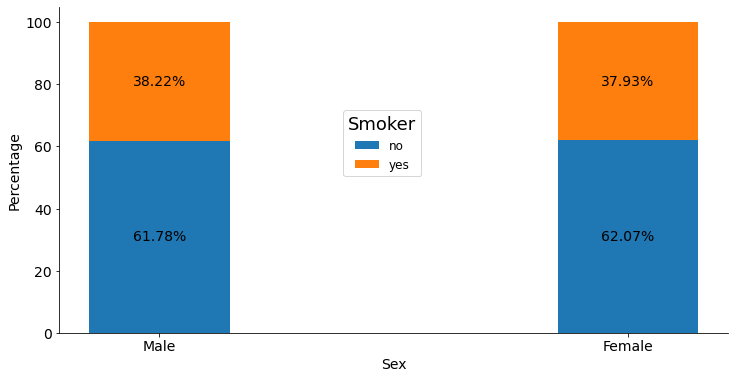

In [11]:
# Add labels
for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + '%' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 14) # add a container object "c" as first argument
# Remove spines
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
# Add labels
ax.tick_params(labelsize = 14, labelrotation = 0)
ax.set_ylabel('Percentage', size = 14)
ax.set_xlabel('Sex', size = 14)
# Add legend
ax.legend(labels = ['no', 'yes'],
          fontsize = 12,
          title = 'Smoker',
          title_fontsize = 18,
          bbox_to_anchor = [0.55, 0.7])
# Fix legend position
# ax.legend_.set_bbox_to_anchor([0.55, 0.7])
fig

<AxesSubplot:xlabel='sex'>

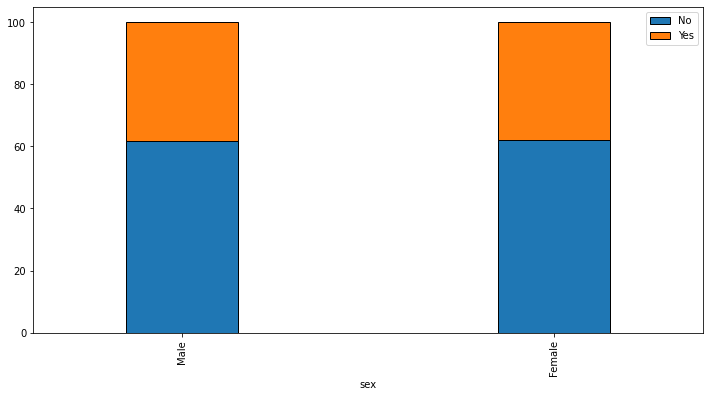

In [12]:
fig, ax = plt.subplots(figsize = (12, 6))
# Plot
df.plot(kind = 'bar',
        stacked = True,
        ax = ax,
        width = 0.3,
        edgecolor = 'black')

<AxesSubplot:xlabel='sex'>

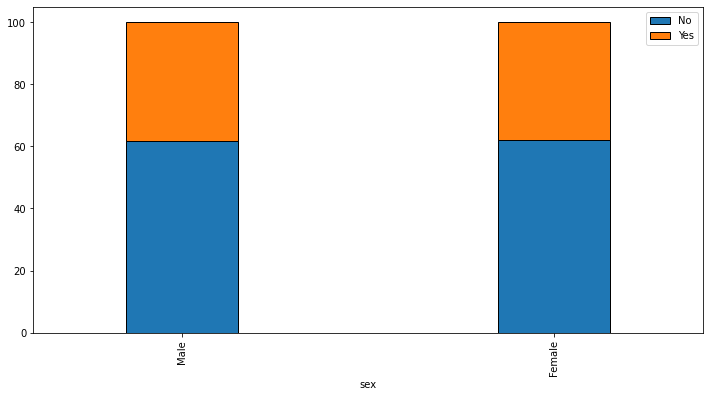

In [13]:
fig, ax = plt.subplots(figsize = (12, 6))
# Plot
df.plot.bar(stacked = True,
            ax = ax,
            width = 0.3,
            edgecolor = 'black')

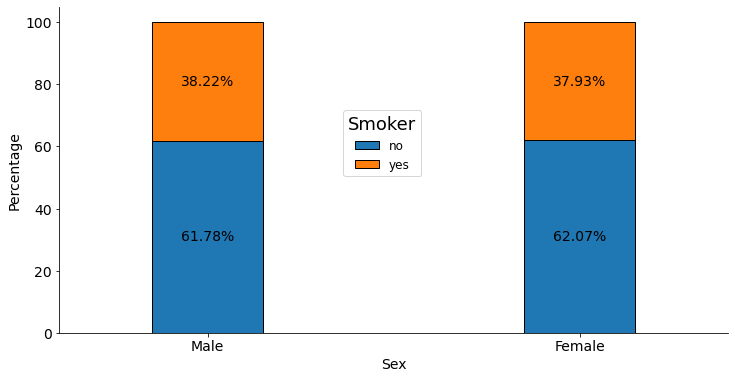

In [14]:
# Adding bar labels
for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + '%' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 14) # add a container object "c" as first argument
# Removing spines
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
# Adding tick and axes labels
ax.tick_params(labelsize = 14, labelrotation = 0)
ax.set_ylabel('Percentage', size = 14)
ax.set_xlabel('Sex', size = 14)
# Customising legend
ax.legend(labels = ['no', 'yes'],
          fontsize = 12,
          title = 'Smoker',
          title_fontsize = 18)
# Fixing legend position
ax.legend_.set_bbox_to_anchor([0.55, 0.7])
fig